In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from math import *
import os
from mpl_toolkits import mplot3d
import random 

# %matplotlib notebook
%matplotlib inline



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ECHELLE = 128
SEUIL = 100

In [ ]:
# création du tableau contenant les images originales d'entrainement et le tableau contenant les masques de chaque images.

chemin_img_original_entrai = '/content/drive/MyDrive/TrainDataSet/original_images'
chemin_mask_img_entrai = '/content/drive/MyDrive/TrainDataSet/trainmask'

img_list = [ f for f in os.listdir(chemin_img_original_entrai) if os.path.isfile(os.path.join(chemin_img_original_entrai,f)) ]

original_img_list= []
original_img_mask = []


for img in img_list:
    image = cv.imread(os.path.join(chemin_img_original_entrai, img))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    original_img_list.append(image)
    
for img in img_list:
    image_mask = cv.imread(os.path.join(chemin_mask_img_entrai, img.split('.')[0]+'.png'), cv.IMREAD_GRAYSCALE)
    original_img_mask.append(image_mask)
    
original_img_list = np.array(original_img_list)
original_img_mask  = np.array(original_img_mask)
print('forme tableau images originales:', original_img_list.shape)
print('forme tableau masques images:', original_img_mask.shape)

forme tableau images originales: (1200, 227, 227, 3)
forme tableau masques images: (1200, 227, 227)


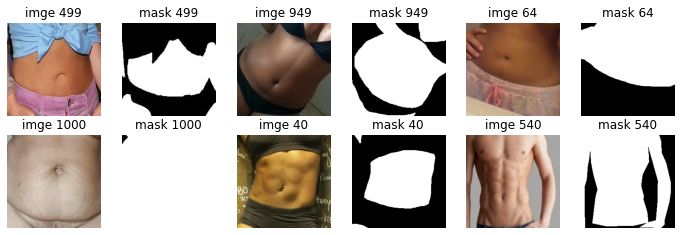

In [ ]:
# Observons quelques images et leurs masques

plt.figure(figsize=(12, 12))
for k, i in np.ndenumerate(np.random.randint(original_img_list.shape[0], size=6)):
    ax = plt.subplot(6, 6, 2 * k[0] + 1)
    plt.imshow(original_img_list[i], cmap='gray')
    plt.title('imge {}'.format(i))
    plt.axis("off")
    x = plt.subplot(6, 6, 2 * k[0] + 2)
    plt.imshow(original_img_mask[i], cmap='gray')
    plt.title('mask {}'.format(i))
    plt.axis("off")

In [ ]:
# Changement de l'espace couleur de RGB à Lab

def Convert_RGB_en_Lab(im_en_RGB):
    convert_lab = [0] * im_en_RGB.shape[0]
    for i, img in enumerate(im_en_RGB):
        convert_lab[i] = cv.cvtColor(img, cv.COLOR_RGB2LAB)
    return np.array(convert_lab)

In [ ]:
liste_images_en_lab = Convert_RGB_en_Lab(original_img_list)

(-0.5, 226.5, 226.5, -0.5)

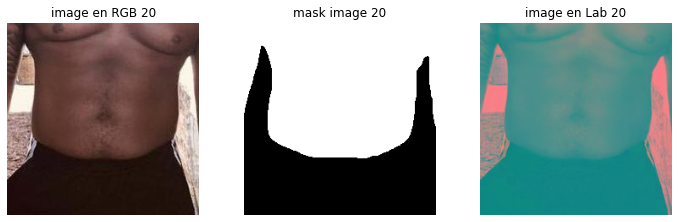

In [ ]:
# Affichage d'une image dans l'espace Lab 

i = 20

plt.figure(figsize=(12, 12))
ax = plt.subplot(3, 3, 1)
plt.imshow(original_img_list[i])
plt.title('image en RGB {}'.format(i))
plt.axis("off")


ax = plt.subplot(3, 3, 2)
plt.imshow(original_img_mask [i], cmap='gray')
plt.title('mask image {}'.format(i))
plt.axis("off")

ax = plt.subplot(3, 3, 3)
plt.imshow(liste_images_en_lab[i])
plt.title('image en Lab {}'.format(i))
plt.axis("off")


In [ ]:
#recuperation des pixels des differentes channels L, a et b dans l'espace couleur Lab
canal_L,canal_a,canal_b = cv.split(liste_images_en_lab[20])


print('valeur minimale d\'un pixel dans le canal L : {}'.format(np.array(canal_L).min()))
print('valeur maximale d\'un pixel dans le canal L : {}'.format(np.array(canal_L).max()))
print()
print('valeur minimale d\'un pixel dans le canal a : {}'.format(np.array(canal_a).min()))
print('valeur maximale d\'un pixel dans le canal a : {}'.format(np.array(canal_a).max()))
print()
print('valeur minimale d\'un pixel dans le canal b : {}'.format(np.array(canal_b).min()))
print('valeur maximale d\'un pixel dans le canal b : {}'.format(np.array(canal_b).max()))

valeur minimale d'un pixel dans le canal L : 1
valeur maximale d'un pixel dans le canal L : 254

valeur minimale d'un pixel dans le canal a : 125
valeur maximale d'un pixel dans le canal a : 149

valeur minimale d'un pixel dans le canal b : 121
valeur maximale d'un pixel dans le canal b : 153


In [ ]:
# reduction de  l'intervalle des valeurs des pixels dans les cannaux a et b

def reduce_Lab8_Labx(img_lab):
    tab_val = [0] * 256 #permet de créer un tableau avec des valeurs de 0 à 256
    for i in range(256):
        tab_val[i] = floor(i / (256/ECHELLE))
    
    for ind, img in enumerate(img_lab):
        h, l, d = img.shape #recupération des pixels de l'image en hauteur et largeur sur les différents cannaux Lab
        image = np.asarray(np.zeros((h, l, d), dtype=np.uint8)) #on crée un tableau de valeurs de pixels d'une image initialisé à zéro
#insertion dans le tableau image vide des nouvelles valeurs des pixels réduites
        for i in range(h):
            for j in range(l):
                for k in range(1, 3):
                    image[i, j][k] = tab_val[img[i, j][k]]
                image[i, j][0] = img[i, j][0]
        img_lab[ind] = image
        
    return img_lab

In [ ]:
img_lab_reduite = reduce_Lab8_Labx(liste_images_en_lab)

In [ ]:
canal_L,canal_a,canal_b = cv.split(img_lab_reduite [20])

print('valeur minimale d\'un pixel dans le canal a apres reduction  : {}'.format(np.array(canal_a).min()))
print('valeur maximale d\'un pixel dans le canal a apres reduction: {}'.format(np.array(canal_a).max()))
print()
print('valeur minimale d\'un pixel dans le canal b apres reduction : {}'.format(np.array(canal_b).min()))
print('valeur maximale d\'un pixel dans le canal b apres reduction : {}'.format(np.array(canal_b).max()))

valeur minimale d'un pixel dans le canal a apres reduction  : 62
valeur maximale d'un pixel dans le canal a apres reduction: 74

valeur minimale d'un pixel dans le canal b apres reduction : 60
valeur maximale d'un pixel dans le canal b apres reduction : 76


(-0.5, 226.5, 226.5, -0.5)

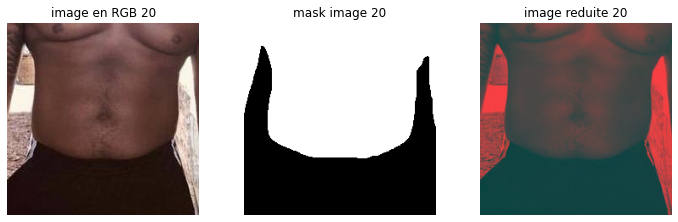

In [ ]:
# Première image dans l'espace Lab avec les intervalles de a et b convertis

i = 20


plt.figure(figsize=(12, 12))
ax = plt.subplot(3, 3, 1)
plt.imshow(original_img_list[i])
plt.title('image en RGB {}'.format(i))
plt.axis("off")

ax = plt.subplot(3, 3, 2)
plt.imshow(original_img_mask [i], cmap='gray')
plt.title('mask image {}'.format(i))
plt.axis("off")

ax = plt.subplot(3, 3, 3)
plt.imshow(img_lab_reduite [i])
plt.title('image reduite {}'.format(i))
plt.axis("off")


In [ ]:
# Fonction de calcul de l'histogramme peau

def HistogrammePeau(images_en_lab, masque_img):
    z = np.zeros((ECHELLE, ECHELLE))
    
    for ind, img in enumerate(images_en_lab):
        canal_l, canal_a, canal_b = cv.split(img)
        masque = masque_img[ind]
    
        m, n = canal_b.shape
        
        for i in range(m):
            for j in range(n):
                if masque[i][j] > SEUIL:
                   n_ = canal_b[i, j]
                   m_ = canal_a[i, j]                            
                   z[m_, n_] += 1
    return sum(sum(z)), z / sum(sum(z))


# Fonction de calcul de l'histogramme non peau

def HistogrammeNonPeau(images_en_lab, masque_img):
    z = np.zeros((ECHELLE, ECHELLE))
    
    for ind, img in enumerate(images_en_lab):
        canal_l, canal_a, canal_b = cv.split(img)
        masque = masque_img[ind]
    
        m, n = canal_b.shape
        
        for i in range(m):
            for j in range(n):
                if masque[i][j] < SEUIL:
                    n_ = canal_b[i, j] 
                    m_ = canal_a[i, j] 
                    z[m_, n_] += 1
    return sum(sum(z)), z / sum(sum(z))

In [ ]:
m = np.linspace(0, ECHELLE-1, ECHELLE)
n = np.linspace(0, ECHELLE-1, ECHELLE)

m, n = np.meshgrid(m, n)

total_peau, normalise_peau = HistogrammePeau(img_lab_reduite, original_img_mask) #normalise_peau represente les valeurs normalisés des pixels peau
total_non_peau, normalise_non_peau = HistogrammeNonPeau(img_lab_reduite, original_img_mask)

In [ ]:
print(normalise_non_peau)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print('pixel peau total: {}'.format(int(total_peau)))
print('pixel non peau total: {}'.format(int(total_non_peau)))

pixel peau total: 40599139
pixel non peau total: 21234970


In [ ]:
print(sum(sum(normalise_peau)))
print(sum(sum(normalise_non_peau)))

1.0
0.9999999999999997


In [ ]:
# augmentation du nombre de pixel non peau pour équilibrer avec le nombre de pixel peau 

path_other_img_train = '/content/drive/MyDrive/TrainDataSet/autres_images/Autres images'

liste_images = [ f for f in os.listdir(path_other_img_train) if os.path.isfile(os.path.join(path_other_img_train,f)) ]

liste_autre_images = []

for img in liste_images:
    image = cv.imread(os.path.join(path_other_img_train, img))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    liste_autre_images.append(image)
    
liste_autre_images = np.array(liste_autre_images)
print(liste_autre_images.shape)

(266, 256, 256, 3)


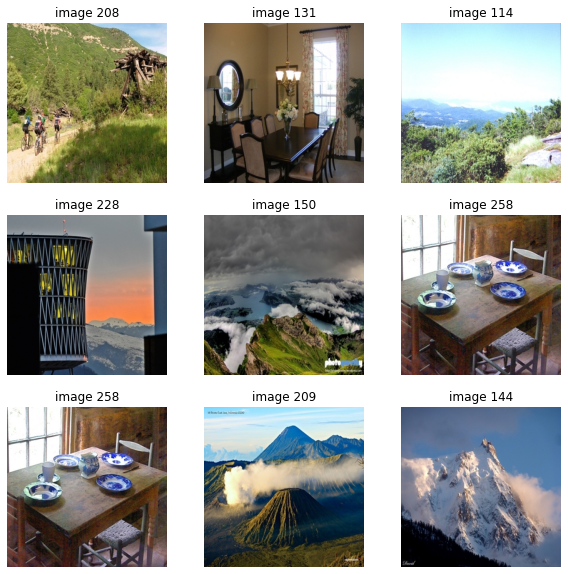

In [ ]:
# On affiche quelques images

plt.figure(figsize=(10, 10))
for k, i in np.ndenumerate(np.random.randint(liste_autre_images.shape[0], size=9)):
    ax = plt.subplot(3, 3, k[0] + 1)
    plt.imshow(liste_autre_images[i])
    plt.title('image {}'.format(i))
    plt.axis("off")

In [ ]:
# Augmentation du nombre pixel non peau

liste_autre_imge_lab = Convert_RGB_en_Lab(liste_autre_images)

liste_autre_img_lab_reduite = reduce_Lab8_Labx(liste_autre_imge_lab)

# Fonction d'augmentation des pixels non peau

def HistogrammeNonPeauAjouter(images_en_lab, masque_img, autres_img):
    z = np.zeros((ECHELLE, ECHELLE))
    
    for index, img in enumerate(images_en_lab):
        canal_l, canal_a, canal_b = cv.split(img)
        masque = masque_img[index]
    
        x, y = canal_b.shape
        
        for i in range(x):
            for j in range(y):
                if masque[i][j] < SEUIL:
                    y_ = canal_b[i, j]
                    x_ = canal_a[i, j]                       
                    z[x_, y_] += 1
                    
    for index, img in enumerate(autres_img):
        canal_l, canal_a, canal_b = cv.split(img)
    
        x, y = canal_b.shape
        
        for i in range(x):
            for j in range(y):
                y_ = canal_b[i, j]  
                x_ = canal_a[i, j]              
                z[x_, y_] += 1
                
    return sum(sum(z)), z / sum(sum(z))

In [ ]:
x = np.linspace(0, ECHELLE-1, ECHELLE)
y = np.linspace(0, ECHELLE-1, ECHELLE)

X, Y = np.meshgrid(x, y)

total_peau, normalise_peau = HistogrammePeau(img_lab_reduite, original_img_mask)
total_non_peau, normalise_non_peau = HistogrammeNonPeauAjouter(img_lab_reduite, original_img_mask, liste_autre_img_lab_reduite)

In [ ]:
print('Nombre total de pixel peau: {}'.format(int(total_peau)))
print('Nombre total de pixel non peau: {}'.format(int(total_non_peau)))

Nombre total de pixel peau: 40599139
Nombre total de pixel non peau: 38667546


In [ ]:
print(sum(sum(normalise_peau)))
print(sum(sum(normalise_non_peau)))

1.0
1.0000000000000004


In [ ]:
print(total_peau)
print(total_non_peau)

40599139.0
38667546.0


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


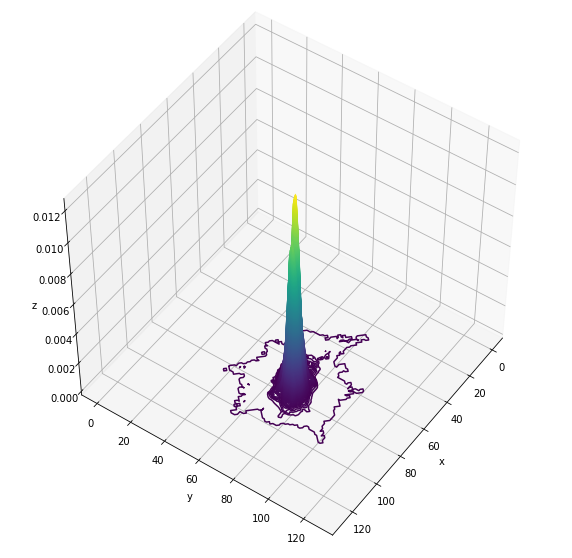

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, normalise_peau, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 35)

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


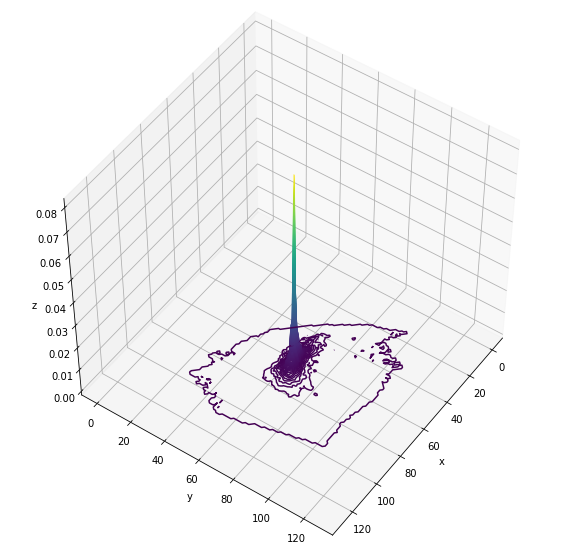

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, normalise_non_peau, 500)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(50, 35)

In [ ]:

def repere_peau(a, b, normalise_peau, normalise_non_peau):
    p_peau = normalise_peau[a, b]
    p_non_peau = normalise_non_peau[a, b]
    return np.argmax([p_non_peau, p_peau])

def proba_peau_bayes(a, b, normalise_peau, normalise_non_peau, t_p, t_n_p):
    try:
        u = normalise_peau[a, b] * (t_p / (t_p + t_n_p))
        p_peau = u / (u + (normalise_non_peau[a, b] * (t_n_p / (t_p + t_n_p))))
    except:
        return 0
    return p_peau
    
def detection_peau(img, normalise_peau, normalise_non_peau, t_p, t_n_p, s):
    # conversion dans l'espace lab
    img_lab = cv.cvtColor(img, cv.COLOR_RGB2LAB)
    
    # modification des intervalles de a et b
    temp = [0] * 256
    for i in range(256):
        temp[i] = floor(i / (256/ECHELLE))
    
    h, l, d = img_lab.shape
    image = np.asarray(np.zeros((h, l, d), dtype=np.uint8))

    for i in range(h):
        for j in range(l):
            for k in range(1, 3):
                image[i, j][k] = temp[img_lab[i, j][k]]
            image[i, j][0] = img_lab[i, j][0]
    img_lab = image
    
    # detection de la peau et mise à 0 des valeurs des pixels non peau 
    for i in range(h):
        for j in range(l):
            if not proba_peau_bayes(img_lab[i, j][1], img_lab[i, j][2], normalise_peau, normalise_non_peau, t_p, t_n_p) >= s:
                for k in range(0, 3):
                    img[i, j][k] = 0
    
    return img

def peau_normale(img, masque):
    x, y = masque.shape

    for i in range(x):
        for j in range(y):
            if masque[i][j] < SEUIL:
                for k in range(0, 3):
                    img[i, j][k] = 0
                    
    return img 

In [ ]:
# création du tableau contenant les images test et le tableau contenant les masques de chaque images test.

chemin_img_test = '/content/drive/MyDrive/TrainDataSet/test/original_images'
chemin_mask_img_test = '/content/drive/MyDrive/TrainDataSet/test/skin_masks'

image_list_test = [ f for f in os.listdir(chemin_img_test) if os.path.isfile(os.path.join(chemin_img_test,f)) ]

img_list_test= []
img_mask_test = []


for img in image_list_test:
    image = cv.imread(os.path.join(chemin_img_test, img))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    img_list_test.append(image)
    
for img in image_list_test:
    image_mask = cv.imread(os.path.join(chemin_mask_img_test, img.split('.')[0]+'.png'), cv.IMREAD_GRAYSCALE)
    img_mask_test.append(image_mask)
    
img_list_test = np.array(img_list_test)
img_mask_test = np.array(img_mask_test)
print('forme tableau images test:',  img_list_test.shape)
print('forme tableau masques images test:', img_mask_test .shape)

forme tableau images test: (200, 227, 227, 3)
forme tableau masques images test: (200, 227, 227)


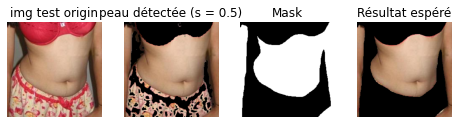

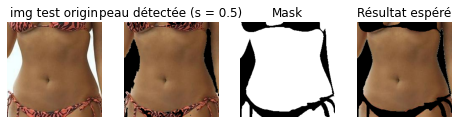

In [ ]:
# Affichage du resultat de peau détectée sur deux images prix aléatoirement dans les images test
%matplotlib inline

for k, i in np.ndenumerate(np.random.randint(img_list_test.shape[0], size=2)):
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(4, 4, 4*k[0] + 1)
    plt.imshow(img_list_test[i])
    plt.title('img test origin')
    plt.axis("off")

    x = plt.subplot(4, 4, 4*k[0] + 2)
    plt.imshow(detection_peau(img_list_test[i].copy(), normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.5))
    plt.title('peau détectée (s = 0.5)')
    plt.axis("off")

    x = plt.subplot(4, 4, 4*k[0] + 3)
    plt.imshow(img_mask_test[i], cmap='gray')
    plt.title('Mask')
    plt.axis("off")

    x = plt.subplot(4, 4, 4*k[0] + 4)
    plt.imshow(peau_normale(img_list_test[i].copy(), img_mask_test[i]))
    plt.title('Résultat espéré')
    plt.axis("off")

(-0.5, 226.5, 226.5, -0.5)

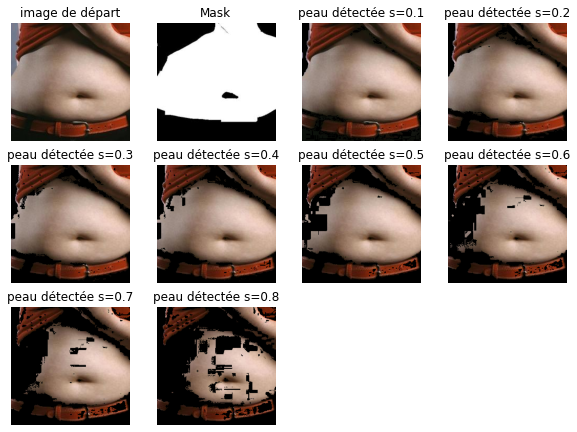

In [ ]:
i=14
plt.figure(figsize=(10, 10))
ax = plt.subplot(4, 4, 1)
plt.imshow(img_list_test[i])
plt.title('image de départ')
plt.axis("off")

ax = plt.subplot(4, 4, 2)
plt.imshow(img_mask_test[i], cmap='gray')
plt.title('Mask')
plt.axis("off")

ax = plt.subplot(4, 4, 3)
plt.imshow(detection_peau(img_list_test[i].copy(), normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.1))
plt.title('peau détectée s=0.1')
plt.axis("off")

ax = plt.subplot(4, 4, 4)
plt.imshow(detection_peau(img_list_test[i].copy(), normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.2))
plt.title('peau détectée s=0.2')
plt.axis("off")

ax = plt.subplot(4, 4, 5)
plt.imshow(detection_peau(img_list_test[i].copy(), normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.3))
plt.title('peau détectée s=0.3')
plt.axis("off")

ax = plt.subplot(4, 4, 6)
plt.imshow(detection_peau(img_list_test[i].copy(), normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.4))
plt.title('peau détectée s=0.4')
plt.axis("off")

ax = plt.subplot(4, 4, 7)
plt.imshow(detection_peau(img_list_test[i].copy(), normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.5))
plt.title('peau détectée s=0.5')
plt.axis("off")

ax = plt.subplot(4, 4, 8)
plt.imshow(detection_peau(img_list_test[i].copy(), normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.6))
plt.title('peau détectée s=0.6')
plt.axis("off")

ax = plt.subplot(4, 4, 9)
plt.imshow(detection_peau(img_list_test[i].copy(), normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.7))
plt.title('peau détectée s=0.7')
plt.axis("off")

ax = plt.subplot(4, 4, 10)
plt.imshow(detection_peau(img_list_test[i].copy(), normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.8))
plt.title('peau détectée s=0.8')
plt.axis("off")

In [ ]:
def evaluation(t_image, t_mask, normalise_peau, normalise_non_peau, total_peau, total_non_peau, s):
    t_image = Convert_RGB_en_Lab(t_image) # On modifie l'espace de couleur
    t_image = reduce_Lab8_Labx(t_image)  # On modifie la plage de valeur des pixels

    true_positif = 0
    false_positif = 0
    true_negatif = 0
    false_negatif = 0
    
    for index, img in enumerate(t_image):
        mask = t_mask[index]
        x, y = mask.shape
        
        for i in range(x):
            for j in range(y):
                if mask[i][j] > 100:  # peau
                    if proba_peau_bayes(img[i, j][1], img[i, j][2], normalise_peau, normalise_non_peau, total_peau, total_non_peau) >= s:  # peau prédite
                        true_positif += 1
                    else:
                        false_negatif += 1
                else:  # non peau
                    if proba_peau_bayes(img[i, j][1], img[i, j][2], normalise_peau, normalise_non_peau, total_peau, total_non_peau) >= s:  # peau prédite
                        false_positif += 1
                    else:
                        true_negatif += 1
                        
    print(true_positif, false_positif, true_negatif, false_negatif)
                        
    precision = true_positif / (true_positif + false_positif)
    recall = true_positif / (true_positif + false_negatif)
    f_score = (2 * precision * recall) / (precision + recall)
    
    
                        
    return f_score, precision, recall

In [ ]:
# Chargement des images et masques

chemin_img_test = '/content/drive/MyDrive/TrainDataSet/test/original_images'
chemin_masks_img_test = '/content/drive/MyDrive/TrainDataSet/test/skin_masks'

liste_images = [ f for f in os.listdir(chemin_img_test) if os.path.isfile(os.path.join(chemin_img_test,f)) ]

imgs_test = []
masks_test = []

for img in liste_images:
    image = cv.imread(os.path.join(chemin_img_test, img))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    imgs_test.append(image)
    
for img in liste_images:
    image_mask = cv.imread(os.path.join(chemin_masks_img_test, img.split('.')[0]+'.png'), cv.IMREAD_GRAYSCALE)
    masks_test.append(image_mask)
    
imgs_test = np.array(imgs_test)
masks_test = np.array(masks_test)
print(masks_test .shape)

(200, 227, 227)


In [ ]:
evaluation(imgs_test, masks_test, normalise_peau, normalise_non_peau, total_peau, total_non_peau, 0.4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


6111432 776159 3011733 406476


(0.9117798598918251, 0.8873105270042894, 0.937637045506012)